In this file, I have used Detectron2 to implement an object detection model (faster_rcnn_R_101_FPN; which means faster R-CNN with ResNet 101 with feature pyramid network) on an image using default pre-trained weights. 

For using Detectron2, there are some packages and repository that you need to instal first.These includes:
- Detectron2 repository
- Tensorflow : pip install tensorflow
- Torch : pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0
- Torchvision
- Opencv :pip install opencv-python

#some other requirements are:
- install opencv if not :pip install opencv-python
- pip install --upgrade omegaconf
- pip install git+https://github.com/facebookresearch/fvcore
- The code line below did not work for me in my PC (even though it worked for the other PC!):     
  pip install https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI     
  so instead I used the line below to install pycocotools:   
  conda install pycocotools -c conda-forge



In [ ]:
!pip show pyyaml
!nvcc --version
!python --version

import tensorflow as tf
# tf.__version__
import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())

In [3]:
cd ..

/home/fereshteh/Desktop/Fereshteh_L


In [4]:
cd detectron2 

/home/fereshteh/Desktop/Fereshteh_L/detectron2


In [5]:
!python setup.py build develop  # setup detectron2 library

running build
running build_py
running build_ext
/home/fereshteh/anaconda3/lib/python3.7/site-packages/torch/utils/cpp_extension.py:369: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
Traceback (most recent call last):
  File "setup.py", line 208, in <module>
    cmdclass={"build_ext": torch.utils.cpp_extension.BuildExtension},
  File "/home/fereshteh/anaconda3/lib/python3.7/site-packages/setuptools/__init__.py", line 144, in setup
    return distutils.core.setup(**attrs)
  File "/home/fereshteh/anaconda3/lib/python3.7/distutils/core.py", line 148, in setup
    dist.run_commands()
  File "/home/fereshteh/anaconda3/lib/python3.7/distutils/dist.py", line 966, in run_commands
    self.run_command(cmd)
  File "/home/fereshteh/anaconda3/lib/python3.7/distutils/dist.py", line 985, in run_command
    cmd_obj.run()
  File "/home/fereshteh/an

In [24]:
# Some basic setup
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
# get the image and show it (for this, I show cd to Test folder). I didn't like cv2 as it showed the image in blue tone
# import matplotlib.pyplot as plt
# import cv2

# img=cv2.imread("test.jpg") # if I write the path as well as the name, im reads the path not the image
# # img=cv2.imread("home/fereshteh/Desktop/Fereshteh_L/Test/test.jpg")
# plt.imshow(img)
# plt.show()


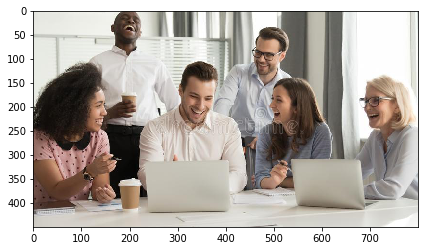

In [8]:
# Show the image
import skimage.io
im=skimage.io.imread('/home/fereshteh/Desktop/Fereshteh_L/Test/test.jpg')
skimage.io.imshow(im)

In [16]:
# Apply image detection with pre-trained weights
# whenever we want to work with detectron2 accepts the datasets in the format of coco datatset. So whenever we want to work with detectron2, we shoudl convert our dataset in the format of cocoddataset
# Create config
cfg=get_cfg()
cfg.merge_from_file("configs/COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml") # choosing faster r-cnn model
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.5 # set the threshold for the model
cfg.MODEL.WEIGHTS="detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl" # choosing the pre-trained weights. notice L (l) and 1 in writing


In [17]:
# Create the predictor
cfg.MODEL.DEVICE="cpu"
predictor=DefaultPredictor(cfg)
outputs=predictor(im)

model_final_f6e8b1.pkl: 243MB [00:02, 88.4MB/s]                              


In [19]:
# Look at the outputs. See https://detectron2.readthedocs.io/tutorials/models.html#model-output-format for specification
print(outputs["instances"].pred_classes) # we can see how many classes are there
print(outputs["instances"].pred_boxes) # getting the bounday boxes

tensor([ 0,  0,  0, 41,  0, 63, 63,  0, 41,  0, 60])
Boxes(tensor([[2.1597e+02, 1.0481e+02, 4.4340e+02, 3.8407e+02],
        [1.1534e+02, 1.0018e+00, 3.0826e+02, 3.6180e+02],
        [4.5752e+02, 1.4570e+02, 6.2188e+02, 3.6911e+02],
        [1.8173e+02, 1.7497e+02, 2.1727e+02, 2.1591e+02],
        [2.6474e-01, 1.0548e+02, 1.8675e+02, 4.0261e+02],
        [5.3635e+02, 3.0793e+02, 7.1740e+02, 4.1320e+02],
        [2.3644e+02, 3.1238e+02, 4.1224e+02, 4.1850e+02],
        [3.7290e+02, 3.6150e+01, 5.4192e+02, 3.6865e+02],
        [1.7797e+02, 3.5000e+02, 2.2393e+02, 4.1220e+02],
        [6.6357e+02, 1.3414e+02, 7.9965e+02, 3.9142e+02],
        [0.0000e+00, 3.6406e+02, 7.8978e+02, 4.4497e+02]]))


<Figure size 720x360 with 0 Axes>

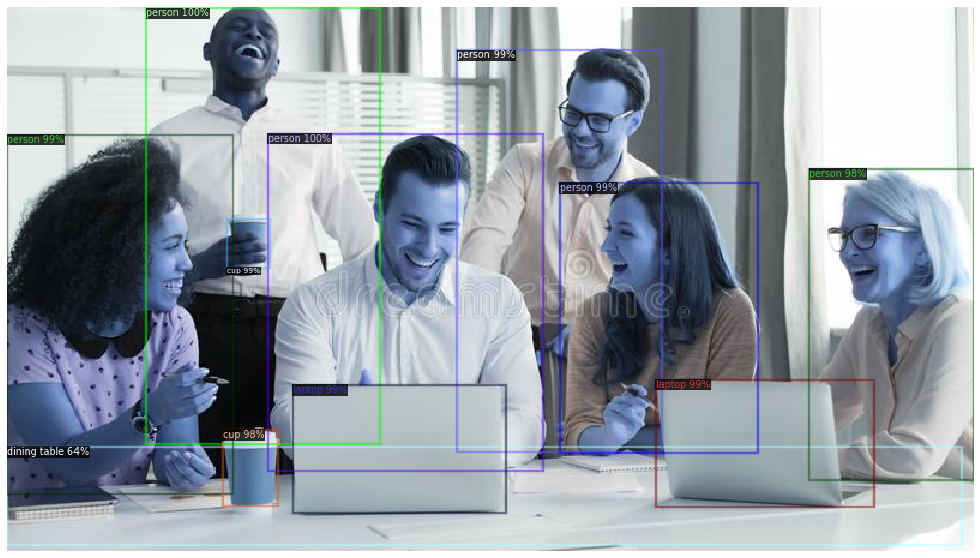

In [28]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

def cv2_imshow(im):
    im=cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)), plt.imshow(im), plt.axis('off'); 

plt.figure(figsize=(10,5))

cv2_imshow(out.get_image()[:, :, ::-1])